In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


scores_df = pd.read_csv('../compas-analysis/compas-scores.csv')
raw_df = pd.read_csv('../compas-analysis/compas-scores-raw.csv')
twoyears_df = pd.read_csv('../compas-analysis/compas-scores-two-years.csv')
violent_df = pd.read_csv('../compas-analysis/compas-scores-two-years-violent.csv')


In [7]:
scores_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,num_r_cases,r_days_from_arrest,is_violent_recid,num_vr_cases,v_decile_score,decile_score.1
count,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,10577.000000,11015.000000,11757.000000,0.0,2460.000000,11757.000000,0.0,11757.000000,11757.000000
mean,5879.000000,35.143319,0.061580,4.371268,0.076040,0.093561,3.082164,-0.878037,63.587653,0.253806,NaN,20.410569,0.075019,NaN,3.571489,4.371268
std,3394.097892,12.022894,0.445328,2.877598,0.449757,0.472003,4.687410,72.889298,341.899711,0.558324,NaN,74.354840,0.263433,NaN,2.500479,2.877598
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,NaN,-1.000000,0.000000,NaN,-1.000000,-1.000000
25%,2940.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,1.000000,2.000000
50%,5879.000000,32.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,3.000000,4.000000
75%,8818.000000,43.000000,0.000000,7.000000,0.000000,0.000000,4.000000,-1.000000,2.000000,1.000000,NaN,1.000000,0.000000,NaN,5.000000,7.000000
max,11757.000000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,NaN,993.000000,1.000000,NaN,10.000000,10.000000


In [8]:
raw_df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


In [9]:
twoyears_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [10]:
violent_df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,...,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4475.000000,4732.000000,4743.000000,...,0.0,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
mean,5454.230445,36.002952,0.045330,3.978073,0.070841,0.080751,2.677209,2.723799,72.691251,0.209783,...,NaN,0.172676,3.978073,3.338815,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,3189.515451,12.200715,0.420694,2.749706,0.406142,0.468779,4.084277,78.074361,385.694476,0.407196,...,NaN,0.378006,2.749706,2.415791,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-345.000000,0.000000,0.000000,...,NaN,0.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2631.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,5475.000000,33.000000,0.000000,3.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,...,NaN,0.000000,3.000000,3.000000,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,8239.500000,44.000000,0.000000,6.000000,0.000000,0.000000,3.000000,-1.000000,2.000000,0.000000,...,NaN,0.000000,6.000000,5.000000,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000
max,11000.000000,83.000000,20.000000,10.000000,8.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,...,NaN,1.000000,10.000000,10.000000,38.000000,672.000000,1186.000000,1.000000,1.000000,1.000000


In [11]:
print(scores_df.columns)
print(raw_df.columns)
print(twoyears_df.columns)
print(violent_df.columns)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases',
       'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date'],
      dtype='object')
Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic

In [12]:
twoyears_df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


### Selected variables

In [13]:
all_variables = ['sex', 'age', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_charge_degree', 'is_recid',
       'is_violent_recid', 'score_text', 'v_decile_score', 'v_score_text', 'two_year_recid']

pred_vars = [
    'sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
    'juv_other_count', 'priors_count', 'c_charge_degree']

### Preprocessing

* Filtering only selected variables
* Removing rows with invalid recidivism value and a minor offense
* Selecting only cases of Caucasian and African-American people
* Creating dummy variables for categorical measures
* Splitting data into training and test sets

In [14]:
np.random.seed(42)

df = twoyears_df[all_variables]
df = df[(df.is_recid != -1) & (df.c_charge_degree != 'O')]

df = df[(df.race == 'Caucasian') | (df.race == 'African-American')]


pred_df = df.filter(items=pred_vars)
pred_df = pd.get_dummies(pred_df, drop_first=True, dtype='int32')

response = df.two_year_recid

X_train, X_test, y_train, y_test = train_test_split(pred_df, response, test_size=0.5)


### Distributions of recidivism among protected groups

In [44]:
pd.DataFrame({'Male_Recid': [
    np.sum(response[(pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 1)]),
    np.sum(response[(pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 0)]),
    np.sum(response[pred_df.sex_Male == 1])
], 'Male_total': [
    np.sum((pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 1)),
    np.sum((pred_df.sex_Male == 1) & (pred_df.race_Caucasian == 0)),
    np.sum(pred_df.sex_Male == 1)
], 'Female_recid': [
    np.sum(response[(pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 1)]),
    np.sum(response[(pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 0)]),
    np.sum(response[pred_df.sex_Male == 0])
], 'Female_total': [
    np.sum((pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 1)),
    np.sum((pred_df.sex_Male == 0) & (pred_df.race_Caucasian == 0)),
    np.sum(pred_df.sex_Male == 0)
], 'Total_recid': [
    np.sum(response[pred_df.race_Caucasian == 1]),
    np.sum(response[pred_df.race_Caucasian == 0]),
    np.sum(response)
], 'Total_total': [
    np.sum(pred_df.race_Caucasian == 1),
    np.sum(pred_df.race_Caucasian == 0),
    pred_df.shape[0]
]}, index=['Caucasian', 'African-American', 'Total'])


,Male_Recid,Male_total,Female_recid,Female_total,Total_recid,Total_total
Caucasian,767,1887,199,567,966,2454
African-American,1654,3044,247,652,1901,3696
Total,2421,4931,446,1219,2867,6150


In [26]:
clf = RFC()
clf.fit(X_train, y_train)

print('Accuracy', clf.score(X_test, y_test))

def get_idx(df, male, caucasian):
    return (df.sex_Male == male) & (df.race_Caucasian == caucasian)

def get_idx_race(df, male, caucasian):
    return (df.race_Caucasian == caucasian)


def get_thorndike(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return (tp + fp) / (tp + fn)



afram_male_th = get_thorndike(1, 0, clf)
afram_female_th = get_thorndike(0, 0, clf)
cauc_male_th = get_thorndike(1, 1, clf)
cauc_female_th = get_thorndike(0, 1, clf)

afram_th = get_thorndike(1, 0, clf, idx_f=get_idx_race)
cauc_th = get_thorndike(1, 1, clf, idx_f=get_idx_race)

print(afram_male_th, afram_female_th, cauc_male_th, cauc_female_th)
print(afram_th, cauc_th)

Accuracy 0.6117073170731707
1.0313253012048194 1.0655737704918034 0.9411764705882353 1.10989010989011
1.0357142857142858 0.9741935483870968


In [28]:
lg = LR()
lg.fit(X_train, y_train)

print('Accuracy', lg.score(X_test, y_test))

def get_idx(df, male, caucasian):
    return (df.sex_Male == male) & (df.race_Caucasian == caucasian)


def get_idx_race(df, male, caucasian):
    return (df.race_Caucasian == caucasian)


def get_idx_sex(df, male, caucasian):
    return df.sex_Male == male


def get_thorndike(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return (tp + fp) / (tp + fn)


def get_sufficiency(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return (tp + fp) / tp, (tn + fn) / tn


def get_separation(male, caucasian, model, x=X_test, y=y_test, idx_f=get_idx):
    y = y[idx_f(x, male, caucasian)]
    x = x[idx_f(x, male, caucasian)]

    tn, fp, fn, tp = confusion_matrix(y, model.predict(x)).ravel()

    return tp / (tp + fn), tn / (tn + fp)


afram_male_th = get_thorndike(1, 0, lg)
afram_female_th = get_thorndike(0, 0, lg)
cauc_male_th = get_thorndike(1, 1, lg)
cauc_female_th = get_thorndike(0, 1, lg)

afram_th = get_thorndike(1, 0, lg, idx_f=get_idx_race)
cauc_th = get_thorndike(1, 1, lg, idx_f=get_idx_race)

male_th = get_thorndike(1, 0, lg, idx_f=get_idx_sex)
female_th = get_thorndike(0, 1, lg, idx_f=get_idx_sex)

print('\nThorndike\n')

print(afram_male_th, afram_female_th, cauc_male_th, cauc_female_th)
print(afram_th, cauc_th)
print(male_th, female_th)

afram_male_suf = get_sufficiency(1, 0, lg)
afram_female_suf = get_sufficiency(0, 0, lg)
cauc_male_suf = get_sufficiency(1, 1, lg)
cauc_female_suf = get_sufficiency(0, 1, lg)

afram_suf = get_sufficiency(1, 0, lg, idx_f=get_idx_race)
cauc_suf = get_sufficiency(1, 1, lg, idx_f=get_idx_race)

male_suf = get_sufficiency(1, 0, lg, idx_f=get_idx_sex)
female_suf = get_sufficiency(0, 1, lg, idx_f=get_idx_sex)

print('\nSufficiency\n')

print(afram_male_suf)
print(afram_female_suf)
print(cauc_male_suf)
print(cauc_female_suf)
print()
print(afram_suf)
print(cauc_suf)
print()
print(male_suf)
print(female_suf)


Accuracy 0.6640650406504065

Thorndike

1.127710843373494 0.7295081967213115 0.7620320855614974 0.3516483516483517
1.0766806722689075 0.6817204301075269
1.0141196013289036 0.568075117370892

Sufficiency

(1.4976, 1.5074257425742574)
(1.679245283018868, 1.4367088607594938)
(1.716867469879518, 1.4601769911504425)
(1.6842105263157894, 1.4363636363636363)

(1.5117994100294985, 1.4875444839857652)
(1.7135135135135136, 1.453808752025932)

(1.5436156763590392, 1.4824766355140186)
(1.6805555555555556, 1.436532507739938)


<AxesSubplot:>

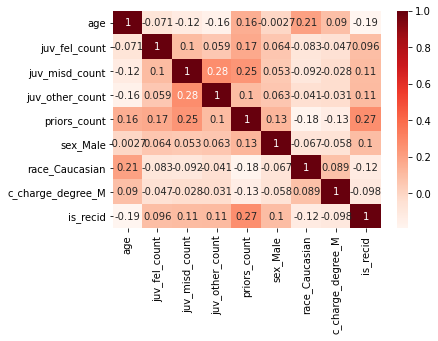

In [12]:
cor_df = pred_df.assign(is_recid=response)
corr = cor_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [29]:
lg.coef_

array([[-0.04864408,  0.18392522, -0.03237128,  0.0924441 ,  0.14757348,
         0.26640099, -0.00676844, -0.21684615]])

Selection bias

### After correction by removing coefficients for protected variables

In [43]:
lg.coef_[0, 5:7] = np.zeros(2)

afram_male_th = get_thorndike(1, 0, lg)
afram_female_th = get_thorndike(0, 0, lg)
cauc_male_th = get_thorndike(1, 1, lg)
cauc_female_th = get_thorndike(0, 1, lg)

afram_th = get_thorndike(1, 0, lg, idx_f=get_idx_race)
cauc_th = get_thorndike(1, 1, lg, idx_f=get_idx_race)

male_th = get_thorndike(1, 0, lg, idx_f=get_idx_sex)
female_th = get_thorndike(0, 1, lg, idx_f=get_idx_sex)

print('Accuracy', lg.score(X_test, y_test))

print('\nThorndike\n')

print(afram_male_th, afram_female_th, cauc_male_th, cauc_female_th)
print(afram_th, cauc_th)
print(male_th, female_th)


Accuracy 0.6617886178861788

Thorndike

0.7518072289156627 0.7295081967213115 0.4946524064171123 0.38461538461538464
0.7489495798319328 0.4731182795698925
0.6719269102990033 0.5821596244131455


Accuracy does not change much, but the two sexes seem to be treated more equally, although the computed values are still not constant for the two. On the other hand, the difference between the fairness for the two races remains quite large. One possible explanation is that we didn't manage to remove the coefficients for all variables correlating with both race and degree of recidivism. However, none of the selected variables correlated highly with each other, so there may be some left out confounders that skew the results against African Americans. 

### After training model with fairness constraints